In [1]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

In [28]:
from typing import List, Union, Optional
import lmfit as lm
from dat_analysis import get_dat, get_dats
from dat_analysis.analysis_tools import nrg
from dat_analysis.analysis_tools.general_fitting import calculate_fit, FitInfo
from dat_analysis.useful_functions import mean_data, get_data_index
from dat_analysis.plotting.mpl.util import make_axes, ax_setup
# from dat_analysis.plotting.mpl.plots import display_2d, waterfall_plot
import matplotlib.pyplot as plt
import matplotlib as mpl
from dataclasses import dataclass
import numpy as np
import datetime

In [4]:
%matplotlib inline
mpl.rcParams.update({
    'figure.figsize': (6.4,4.8),
    'figure.dpi': 110,  # 27in 1440p = 110
})
print(f'Notebook last run on {datetime.date.today()}')

Notebook last run on 2022-03-23


# Introduction

This is intended to answer questions about fitting the dN/dT signal with NRG data, rather than Occupation. 

## Load Data to Fit
For more details about the procedure of loading of data, see `nrg_comparison.ipynb`. Here I will just load data using my analysis backend (and some calculations that I previously saved).

In [39]:
dats = get_dats([2164, 2121, 2167, 2133], exp2hdf='febmar21tim')
fit_widths = [100, 200, 400, 800]
load_name = 'forced_theta_linear'  # Forcing theta to follow linear extrapolation from weakly coupled to strongly coupled regime (best estimate for gamma broadened)
save_name = '22_nrg_dndt'  # For anything I will save in here

## Transition Data

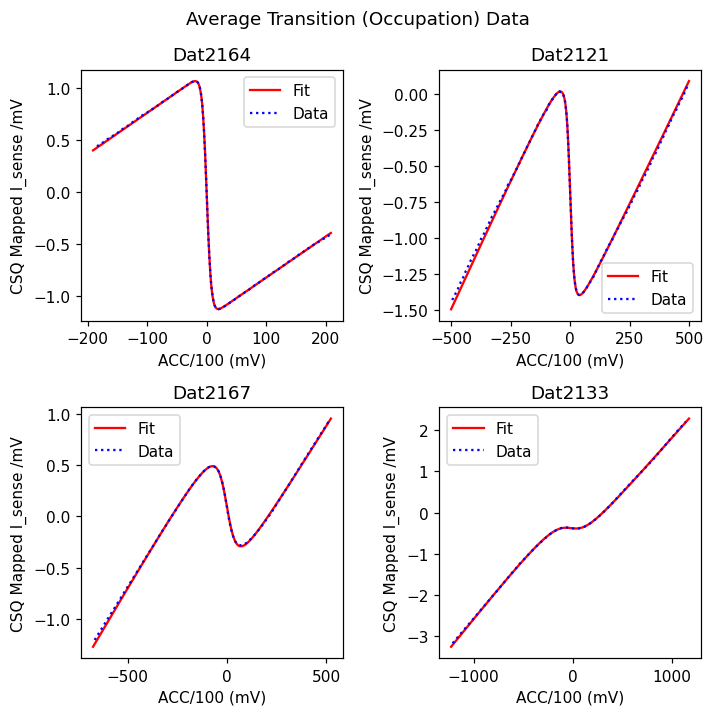

In [41]:
fig, axs = make_axes(len(dats))
fig.suptitle('Average Transition (Occupation) Data')

dat = dats[0]

for dat, ax, fit_width in zip(dats, axs, fit_widths):
    cold_transition = dat.SquareEntropy.get_transition_part(name=load_name, part='cold')
    x = dat.SquareEntropy.avg_x
    
    indexs = get_data_index(x, [-fit_width, fit_width])
    s_ = np.s_[indexs[0]:indexs[1]]
    
    fit = dat.NrgOcc.get_fit(x=x[s_], data=cold_transition[s_], name=save_name, check_exists=False)
#     fit = dat.NrgOcc.get_fit(name='csq_forced_theta', check_exists=True)
    
    ax.plot(x, fit.eval_fit(x), 'r-', label='Fit')
    ax.plot(x, cold_transition, 'b:', label='Data')

    ax.set_xlabel(dat.Logs.xlabel)
    ax.set_ylabel('CSQ Mapped I_sense /mV')
    ax.set_title(f'Dat{dat.datnum}')
    ax.legend()
fig.tight_layout()

Note that the i_sense data here is not in units of nA as it has been mapped back to Charge Sensor QPC gate voltage to help with accounting for the non-linearity of the charge sensor for very wide scans (such as high Gamma scans). 
The y-axis is close to zero only because I subtract the average value after mapping back to CSQ gate voltage, otherwise it would be ~-180 mV 

In [43]:
for dat in dats:
    print(dat.NrgOcc.get_fit(name=save_name).best_values)

amp=2.379
const=0.0064794
g=0.039679
lin=0.003945
mid=8.5899
occ_lin=1.231e-05
theta=3.9831

amp=1.9571
const=-0.61949
g=5.3514
lin=0.0034386
mid=10.245
occ_lin=8.0744e-05
theta=5.2972

amp=1.7145
const=0.21152
g=20.428
lin=0.0031172
mid=18.619
occ_lin=0.00012333
theta=11.295

amp=1.5087
const=-0.21147
g=93.801
lin=0.0027432
mid=4.2135
occ_lin=0.00019215
theta=24.547

